In [128]:
import numpy as np
import random as random
from numpy import random

import matplotlib.pyplot as plt

In [2]:
def obtainRMatrix(m, horizVertValue, diagonValue):
    Rsize = size**2
    rMatrix = inicializeRMatrix(num_col,num_fil)
    res=[]
    horizVert=horizVertValue
    diagon=diagonValue
    for i in range(num_fil):
        for j in range(num_col):
            n0 = m[i][j]
            if 0<i<num_fil-1:
                rMatrix[m[i][j]][m[i-1][j]]=horizVert
                rMatrix[m[i][j]][m[i+1][j]]=horizVert
                
                if(0<j<num_col-1):
                    rMatrix[m[i][j]][m[i-1][j-1]]=diagon
                    rMatrix[m[i][j]][m[i-1][j+1]]=diagon
                    rMatrix[m[i][j]][m[i+1][j-1]]=diagon
                    rMatrix[m[i][j]][m[i+1][j+1]]=diagon
                    
                    rMatrix[m[i][j]][m[i][j-1]]=horizVert
                    rMatrix[m[i][j]][m[i][j+1]]=horizVert
                    
                if(j==0):
                    rMatrix[m[i][j]][m[i-1][j+1]]=diagon
                    rMatrix[m[i][j]][m[i+1][j+1]]=diagon
                    
                    rMatrix[m[i][j]][m[i][j+1]]=horizVert
                    
                if(j==num_col-1):
                    rMatrix[m[i][j]][m[i-1][j-1]]=diagon
                    rMatrix[m[i][j]][m[i+1][j-1]]=diagon
                    
                    rMatrix[m[i][j]][m[i][j-1]]=horizVert
                    
            elif(i==0):
                rMatrix[m[i][j]][m[i+1][j]]=horizVert             
                
                if(j==0):
                    rMatrix[m[i][j]][m[i+1][j+1]]=diagon
                    
                    rMatrix[m[i][j]][m[i][j+1]]=horizVert
                    
                if(j==num_col-1):
                    rMatrix[m[i][j]][m[i+1][j-1]]=diagon
                    
                    rMatrix[m[i][j]][m[i][j-1]]=horizVert
                    
                if(0<j<num_col-1):
                    rMatrix[m[i][j]][m[i+1][j-1]]=diagon  
                    rMatrix[m[i][j]][m[i+1][j+1]]=diagon  
                    
                    rMatrix[m[i][j]][m[i][j+1]]=horizVert 
                    rMatrix[m[i][j]][m[i][j-1]]=horizVert 
                    
            elif i==num_fil-1:
                rMatrix[m[i][j]][m[i-1][j]]=horizVert  
                if(j==0):
                    rMatrix[m[i][j]][m[i-1][j+1]]=diagon  
                    
                    rMatrix[m[i][j]][m[i][j+1]]=horizVert  
                if(j==num_col-1):
                    rMatrix[m[i][j]][m[i-1][j-1]]=diagon  
                    
                    rMatrix[m[i][j]][m[i][j-1]]=horizVert  
                if(0<j<num_col-1):
                    rMatrix[m[i][j]][m[i-1][j+1]]=diagon  
                    rMatrix[m[i][j]][m[i-1][j-1]]=diagon  
                    
                    rMatrix[m[i][j]][m[i][j+1]]=horizVert 
                    rMatrix[m[i][j]][m[i][j-1]]=horizVert  
    return rMatrix

In [3]:
def addObjetives(R,objetives):
    for objetive in objetives:
        for i in range(num_fil**2):
            R[i][objetive] = 100 if (R[i][objetive]!=-1) else -1       
        R[objetive][objetive] = 100
    return R          

In [4]:
def addLayerToMatrix(matrix, layer, count):
    for i in range(layer):
        
        matrix[layer][i] = int(count)
        count=count+1
        
    for i in range(layer+1):
        
        matrix[layer-i][layer] = int(count)
        count=count+1
        
    return [matrix, count]

In [5]:
def createMatrix(m,tam):
    layer=0
    for i in range(tam):
        [m,layer]=addLayerToMatrix(m,i,layer)
    return m

In [6]:
def inicializeRMatrix(numRows, numCols):
    return np.array([-1 for _ in range((numRows**2)*(numCols**2))]).reshape(numRows**2, numCols**2)

Algoritmo de aprendizaje 
-----------------------------------------------------------

In [7]:
def acciones ( matriz, estado ):
    fila_estado = matriz [ estado , : ]
    acciones = [ ]
    for n in range ( len ( fila_estado ) ):
        if (fila_estado [ n ] != -1):
            acciones.append(n)
    return (acciones)

In [8]:
def acciones1 ( matriz, estado ):
    rRow=matriz[estado]
    possibleStatesIndex = np.where(rRow != -1)
    acciones = possibleStatesIndex
    return (acciones)

In [9]:
def maxQValue(Q, R, estado):
    #obtener los estados accesibles desde la matriz R
    rRow = R[estado]
    qRow = Q[estado]
    possibleStatesIndex = np.where(rRow != -1)
    #obtener los valores en la matriz Q
    qLista=qRow[possibleStatesIndex]
    #devolver el máximo
    maxValue=np.amax(qLista)
    return maxValue

In [126]:
def entrenarQFase2 ( Q, R, Gamma, objetivo, num_episodios, alpha, epsilon ):
    #Convertir los valores alpha y epsilon a decimales
    alpha = float( alpha )
    epsilon = float( epsilon )
    rendimiento = []
    while num_episodios > 0:
        estado = random.randint ( 0, (num_fil**2) - 1 )

        while ( estado != objetivo ):
            #Selección aleatoria del número que va a ser comparado con epsilon
            numero_aleatorio = random.uniform( 0, 1 ) 
            if numero_aleatorio < epsilon:
                #Número aleatorio < epsilon --> Acción aleatoria
 #               rRow = R[estado]
 #               acciones = np.where(rRow != -1)
                posiblesAcciones = np.asarray(acciones1(R,estado)).flatten()
                accion_elegida = np.random.choice (posiblesAcciones)

            else:
                #Número aleatorio >= epsilon --> Seleccionamos la acción con el máximo valor en la tabla Q
                qRow = Q [ estado ]
                rRow = R[ estado ]
                
                listaPosibles = takePossibleActionsWithMax(qRow, rRow)
                accion_elegida = np.random.choice (np.asarray(listaPosibles).flatten())
 #               print("Estado:", estado, "listaPosibles", listaPosibles, "ae", accion_elegida)
            siguiente_estado = accion_elegida
            Q [ estado, accion_elegida ] = R [ estado, accion_elegida ] + Gamma * maxQValue(Q,R,siguiente_estado)
            estado = siguiente_estado
            
        rendimiento.append((Q.sum()/np.max(Q))*100)
        num_episodios = num_episodios - 1
        epsilon = epsilon * alpha
    return Q, rendimiento

In [11]:
#####Obtenemos los estados que cumplen la condicion qRow[i] == mavValue && rRow[i] != -1 ####
def takePossibleActionsWithMax(qRow, rRow):        
    maxValue = np.max( qRow )

    posiblesAccionesQ = np.where(qRow == maxValue)
    posiblesAccionesR = np.where(rRow != -1)

    listaPosibles = list(set(posiblesAccionesQ[0]) & set(posiblesAccionesR[0]))
    return listaPosibles

In [12]:
def entrenarQFase1 ( Q, R, Gamma, objetivo, num_episodios ):
    while num_episodios > 0:
        estado = random.randint ( 0, num_fil**2 - 1 )
        while ( estado != objetivo ):
            #acciones = acciones ( R, estado )
            accion_elegida = random.choice ( acciones ( R, estado ) , 1)
            siguiente_estado = accion_elegida
            Q [ estado, accion_elegida ] = R [ estado, accion_elegida ] + Gamma * maxQValue(Q,R,siguiente_estado)
            estado = siguiente_estado
        num_episodios = num_episodios - 1
    return Q

In [13]:
objetivo = int(input('¿Cuál es el estado objetivo?'))

¿Cuál es el estado objetivo? 15


In [14]:
size = int(input('¿Cuál es el tamaño del problema? '))
num_col = size
num_fil = size
states = (num_col*num_fil)**2

¿Cuál es el tamaño del problema?  5


In [139]:
alpha = input('Seleccione un parámetro alpha: [0,1]: ')
epsilon = input('Seleccione un parámetro epsilon: [0,1]: ')

Seleccione un parámetro alpha: [0,1]:  0.5
Seleccione un parámetro epsilon: [0,1]:  0.5


In [133]:
zeroMatrix= np.zeros((num_fil,num_col))
tablero = createMatrix(zeroMatrix,size).astype(int)
rMatrix=obtainRMatrix(tablero, 10, 6)
rMatrix=addObjetives(rMatrix,[objetivo])
qMatrix = np.zeros((size**2,size**2)).astype(int)

In [134]:
tablero

array([[ 0,  3,  8, 15, 24],
       [ 1,  2,  7, 14, 23],
       [ 4,  5,  6, 13, 22],
       [ 9, 10, 11, 12, 21],
       [16, 17, 18, 19, 20]])

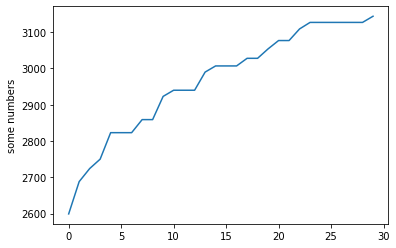

[[  0   0  59   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [ 14   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [ 39   0   0   0  41  67   0   0   6   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  44  42   0   0  67   0   0   0   0  42   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   6  46   0   0   0  46   0   0  14  72  42   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  42   0   0   0   0  90   0   0  42  46   6   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  18   0   0  42  46   0   0   0   0   0   0  35   0 100   0   0
    0   0   0   0   0   0   0]
 [  0   0  59   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  63   0   0   0   0   0   0   0   0  

In [141]:
qMatrix = np.zeros((size**2,size**2)).astype(int)
rend=0
[qTrained, rend] = entrenarQFase2(qMatrix, rMatrix, 0.8, objetivo, 30, alpha, epsilon)

plt.plot(rend)
plt.ylabel('some numbers')
plt.show()
print(qTrained)

In [93]:
rMatrix

array([[ -1,  10,   6,  10,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [ 10,  -1,  10,   6,  10,   6,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [  6,  10,  -1,  10,   6,  10,   6,  10,   6,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [ 10,   6,  10,  -1,  -1,  -1,  -1,   6,  10,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [ -1,  10,   6,  -1,  -1,  10,  -1,  -1,  -1,  10,   6,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [ -1,   6,  10,  -1,  10,  -1,  10,   6,  -1,   6,  10,   6,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
       [ -1,  -1,   6,  -1,  -1,  10,  -1,  10,  -1,  -1,   6,  10,   6,
         10,   6,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1],
      

In [ ]:
qMatrix = np.zeros((size**2,size**2)).astype(int)
entrenarQFase1(qMatrix, rMatrix, 0.8, objetivo, 10000)

In [ ]:
qMatrix=(qMatrix/np.max(qMatrix))*100

Camino eficiente
-----------------------------------------------------------

In [25]:
def findOptimalWay(initialState, Q, objetive):
    #paso1 
    actualState = initialState
    camino = [initialState]
    contador=0
    totalValue=0
    #paso2
    while(actualState!=objetive):
        qRow = Q[actualState]
        maxValue = np.max(qRow)
        maxValueIndex = np.where(qRow == maxValue)
        nextState=maxValueIndex[0][0]
        camino.append(nextState)
        #paso3
        totalValue += maxValue 
        actualState=nextState
        print(actualState)
        contador=contador+1
    return camino, contador, totalValue
    

In [110]:
[camino,contador,totalValue]=findOptimalWay(19, qMatrix, objetivo)
camino

12
13
22
23
15


[19, 12, 13, 22, 23, 15]

In [38]:
tablero

array([[ 0,  3,  8, 15, 24],
       [ 1,  2,  7, 14, 23],
       [ 4,  5,  6, 13, 22],
       [ 9, 10, 11, 12, 21],
       [16, 17, 18, 19, 20]])

In [30]:
qMatrix

array([[  0,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  50,   0,   0,   0,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  18,  26,   0,   0,   0,   0,   0,   0,   0,  55,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  37,   0,  58,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0,  42,
         70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      

In [ ]:


tablero